In [24]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier


In [25]:
df_clean=pd.read_csv('clean_df.csv')
df=df_clean[df_clean['symbol_id']=='XLM_512']
df.index=df['time_close']
df_clean=df_clean.set_index('time_close')
ltc=df_clean[df_clean['symbol_id']=='LTC_2']['close']
xrp=df_clean[df_clean['symbol_id']=='XRP_52']['close']
doge=df_clean[df_clean['symbol_id']=='DOGE_74']['close']
eth=df_clean[df_clean['symbol_id']=='ETH_1027']['close']
btc=df_clean[df_clean['symbol_id']=='BTC_1']['close']
xmr=df_clean[df_clean['symbol_id']=='XMR_328']['close']

for i in ['SPY','VIX','Gold','Oil','EUR_USD','10Y Treasury','marketcap']:
    df[i+'_ret']=df[i].pct_change()

df3=df.copy()
df3['ltc']=ltc
df3['xrp']=xrp
df3['doge']=doge
df3['eth']=eth
df3['btc']=btc
df3['xmr']=xmr

df3['ltc_ret']=df3['ltc'].pct_change()#.shift(2)
df3['xrp_ret']=df3['xrp'].pct_change()#.shift(2)
df3['doge_ret']=df3['doge'].pct_change()#.shift(2)
df3['eth_ret']=df3['eth'].pct_change()#.shift(2)
df3['btc_ret']=df3['btc'].pct_change()#.shift(2)
df3['xmr_ret']=df3['xmr'].pct_change()#.shift(2)
df3.columns

Index(['symbol_id', 'time_close', 'close', 'volume', 'marketcap', 'month',
       'day', 'weekday', 'day of week', 'price change', 'volume change',
       'tomorrow change', 'SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil',
       'EUR_USD', 'SPY_ret', 'VIX_ret', 'Gold_ret', 'Oil_ret', 'EUR_USD_ret',
       '10Y Treasury_ret', 'marketcap_ret', 'ltc', 'xrp', 'doge', 'eth', 'btc',
       'xmr', 'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret',
       'xmr_ret'],
      dtype='object')

In [26]:
df3=df3.drop(columns=['month','symbol_id','time_close', 'close','volume', 'marketcap','SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil',
       'EUR_USD','ltc', 'xrp', 'doge', 'eth', 'btc','xmr'])
df3

,day,weekday,day of week,price change,volume change,tomorrow change,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret
time_close,,,,,,,,,,,,,,,,,,,
2020-09-24,24,3,1,-0.041776,0.130112,0.023188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,25,4,1,0.023188,0.153256,0.066801,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511,0.023040,0.027876,0.040102,0.021075,0.078154,0.046477,0.037234
2020-09-26,26,5,0,0.066801,0.211185,-0.010805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505
2020-09-27,27,6,0,-0.010805,-0.295592,-0.000851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696
2020-09-28,28,0,1,-0.000851,-0.005278,-0.003863,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,29,3,1,-0.014612,-0.060907,0.053767,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601
2022-09-30,30,4,1,0.053767,0.420765,0.001370,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212,0.054098,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835
2022-10-01,1,5,0,0.001370,-0.147152,0.058336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111


In [27]:
df3.drop(df3['ltc_ret'].head(1).index, inplace=True) 
df3.columns


Index(['day', 'weekday', 'day of week', 'price change', 'volume change',
       'tomorrow change', 'SPY_ret', 'VIX_ret', 'Gold_ret', 'Oil_ret',
       'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret', 'ltc_ret',
       'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret'],
      dtype='object')

In [28]:
df3

,day,weekday,day of week,price change,volume change,tomorrow change,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret
time_close,,,,,,,,,,,,,,,,,,,
2020-09-25,25,4,1,0.023188,0.153256,0.066801,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511,0.023040,0.027876,0.040102,0.021075,0.078154,0.046477,0.037234
2020-09-26,26,5,0,0.066801,0.211185,-0.010805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505
2020-09-27,27,6,0,-0.010805,-0.295592,-0.000851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696
2020-09-28,28,0,1,-0.000851,-0.005278,-0.003863,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372
2020-09-29,29,1,1,-0.003863,0.115246,-0.002508,-0.005446,0.003055,0.011480,-0.032266,0.003737,-0.027149,-0.004224,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,29,3,1,-0.014612,-0.060907,0.053767,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601
2022-09-30,30,4,1,0.053767,0.420765,0.001370,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212,0.054098,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835
2022-10-01,1,5,0,0.001370,-0.147152,0.058336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111


In [5]:
df4=df3.copy()
df4.columns = [c.replace(' ', '_') for c in df4.columns]
df4=df4.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})
reg_mul = smf.ols('tomorrow_change ~  day+weekday+day_of_week+price_change+volume_change+SPY_ret+VIX_ret+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+marketcap_ret+ltc_ret+xrp_ret+doge_ret+eth_ret+btc_ret+xmr_ret', data = df4)
res_mul = reg_mul.fit()
print(res_mul.summary())

                            OLS Regression Results                            
Dep. Variable:        tomorrow_change   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.763
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0261
Time:                        07:10:47   Log-Likelihood:                 816.51
No. Observations:                 686   AIC:                            -1595.
Df Residuals:                     667   BIC:                            -1509.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0030      0.015     

In [6]:
df3.loc[df3['tomorrow change'] < 0, 'target'] = 0
df3.loc[df3['tomorrow change'] > 0, 'target'] = 1
df3

,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY_ret,VIX_ret,Gold_ret,...,EUR_USD_ret,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret,target
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,0.016167,-0.074711,-0.005674,...,0.001261,-0.010511,0.023040,0.027876,0.040102,0.021075,0.078154,0.046477,0.037234,0.0
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505,0.0
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696,0.0
2020-09-30,9,30,2,1,-0.002508,-0.116622,0.022203,0.016609,-0.007202,0.008128,...,-0.003246,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372,1.0
2020-10-01,10,1,3,1,0.022203,0.016281,-0.027199,-0.005446,0.003055,0.011480,...,0.003737,-0.027149,-0.004224,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,-0.002553,0.010539,0.002094,...,-0.006833,0.022176,-0.020926,0.023437,-0.045375,0.003896,0.035091,0.027726,0.050491,1.0
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,0.019676,-0.074233,0.020717,...,-0.002860,-0.065338,-0.038981,-0.023400,-0.054642,-0.011849,-0.007186,-0.011165,-0.017009,1.0
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,-0.020889,0.055003,-0.001144,...,0.011669,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601,1.0


In [29]:
train_size = int(len(df3) * 0.8)
X_train,X_test = df3.drop(columns='tomorrow change').iloc[0:train_size+1,0:], df3.drop(columns=['tomorrow change']).iloc[train_size+1:,0:]
y_train,y_test=df3.iloc[0:train_size+1,5], df3.iloc[train_size+1:,5]
training_set=X_train.copy()
training_set['tomorrow change']=y_train
test_set=X_test.copy()
test_set['tomorrow change']=y_test
training_set, test_set

(            day  weekday  day of week  price change  volume change   SPY_ret  \
 time_close                                                                     
 2020-09-25   25        4            1      0.023188       0.153256  0.016167   
 2020-09-26   26        5            0      0.066801       0.211185  0.000000   
 2020-09-27   27        6            0     -0.010805      -0.295592  0.000000   
 2020-09-28   28        0            1     -0.000851      -0.005278  0.016609   
 2020-09-29   29        1            1     -0.003863       0.115246 -0.005446   
 ...         ...      ...          ...           ...            ...       ...   
 2022-05-14   14        5            0      0.091102      -0.514629  0.000000   
 2022-05-15   15        6            0      0.021352      -0.109327  0.000000   
 2022-05-16   16        0            1      0.047261      -0.204526 -0.004058   
 2022-05-17   17        1            1     -0.037742       0.067012  0.020570   
 2022-05-18   18        2   

In [7]:
train_size = int(len(df3) * 0.8)
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

X_train,X_test = df3.drop(columns=['tomorrow change','target']).iloc[0:train_size+1,0:], df3.drop(columns=['tomorrow change','target']).iloc[train_size+1:,0:]
y_train,y_test=df3.iloc[0:train_size+1,20], df3.iloc[train_size+1:,20]

model3=LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=model3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[42 25]
 [46 24]]


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.48175182481751827

[[40 27]
 [31 39]]
0.5766423357664233


/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


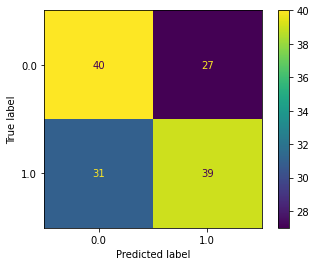

In [17]:
from sklearn.metrics import plot_confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
model3=tree_clf.fit(X_train, y_train)
y_pred=model3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(tree_clf, X_test, y_test) 

In [30]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func = "linear",
                dropout =0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))

    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [33]:
df3.columns

len(training_set)-5#551-5=0-545=546times,[545:550]
#5:550->546times

546

In [34]:
window_len = 5
norm_cols = [ 'price change','volume change']
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set.drop(columns='tomorrow change').iloc[i:(i+window_len),:].copy()
    LSTM_training_inputs.append(temp_set)
    
LSTM_training_outputs = training_set['tomorrow change'][window_len:].values
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set.drop(columns='tomorrow change').iloc[i:(i+window_len),:].copy()
    LSTM_test_inputs.append(temp_set)

LSTM_test_outputs = test_set['tomorrow change'][window_len:].values
print(LSTM_training_inputs[0])


            day  weekday  day of week  price change  volume change   SPY_ret  \
time_close                                                                     
2020-09-25   25        4            1      0.023188       0.153256  0.016167   
2020-09-26   26        5            0      0.066801       0.211185  0.000000   
2020-09-27   27        6            0     -0.010805      -0.295592  0.000000   
2020-09-28   28        0            1     -0.000851      -0.005278  0.016609   
2020-09-29   29        1            1     -0.003863       0.115246 -0.005446   

             VIX_ret  Gold_ret   Oil_ret  EUR_USD_ret  10Y Treasury_ret  \
time_close                                                                
2020-09-25 -0.074711 -0.005674 -0.001488     0.001261         -0.010511   
2020-09-26  0.000000  0.000000  0.000000     0.000000          0.000000   
2020-09-27  0.000000  0.000000  0.000000     0.000000          0.000000   
2020-09-28 -0.007202  0.008128  0.008696    -0.003246          0

In [36]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [98]:
# random seed for reproducibility
np.random.seed(42)
# initialise model architecture
xlm_model = build_model(LSTM_training_inputs, output_size=1, neurons = 50)

xlm_history = xlm_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
546/546 - 3s - loss: 0.1636
Epoch 2/50
546/546 - 2s - loss: 0.0810
Epoch 3/50
546/546 - 2s - loss: 0.0612
Epoch 4/50
546/546 - 2s - loss: 0.0539
Epoch 5/50
546/546 - 2s - loss: 0.0498
Epoch 6/50
546/546 - 1s - loss: 0.0501
Epoch 7/50
546/546 - 1s - loss: 0.0486
Epoch 8/50
546/546 - 2s - loss: 0.0474
Epoch 9/50
546/546 - 2s - loss: 0.0475
Epoch 10/50
546/546 - 1s - loss: 0.0473
Epoch 11/50
546/546 - 1s - loss: 0.0478
Epoch 12/50
546/546 - 2s - loss: 0.0474
Epoch 13/50
546/546 - 2s - loss: 0.0471
Epoch 14/50
546/546 - 2s - loss: 0.0465
Epoch 15/50
546/546 - 2s - loss: 0.0468
Epoch 16/50
546/546 - 1s - loss: 0.0460
Epoch 17/50
546/546 - 2s - loss: 0.0466
Epoch 18/50
546/546 - 2s - loss: 0.0459
Epoch 19/50
546/546 - 1s - loss: 0.0459
Epoch 20/50
546/546 - 1s - loss: 0.0464
Epoch 21/50
546/546 - 1s - loss: 0.0460
Epoch 22/50
546/546 - 2s - loss: 0.0456
Epoch 23/50
546/546 - 2s - loss: 0.0456
Epoch 24/50
546/546 - 2s - loss: 0.0453
Epoch 25/50
546/546 - 2s - loss: 0.0458
Epoch 26/

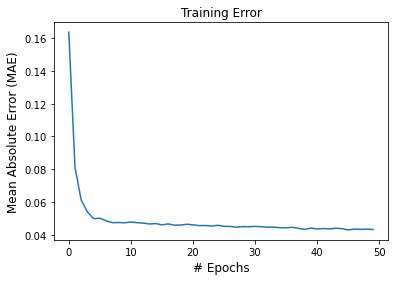

In [99]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(xlm_history.epoch, xlm_history.history['loss'])
ax1.set_title('Training Error')

if xlm_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [47]:
df3.iloc[train_size]
split_date='2022-05-18'

In [49]:
df

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,...,Gold,Oil,EUR_USD,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,XLM_512,2020-09-24,0.068613,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,...,1868.300049,40.310001,1.165854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,...,1857.699951,40.250000,1.167324,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511,0.023040
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,...,1857.699951,40.250000,1.167324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,...,1857.699951,40.250000,1.167324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,...,1872.800049,40.599998,1.163535,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070,-0.000851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,...,1658.500000,81.230003,0.970817,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336,-0.013993
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,...,1662.400024,79.489998,0.982956,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212,0.054098
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,...,1662.400024,79.489998,0.982956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409


In [50]:
import datetime

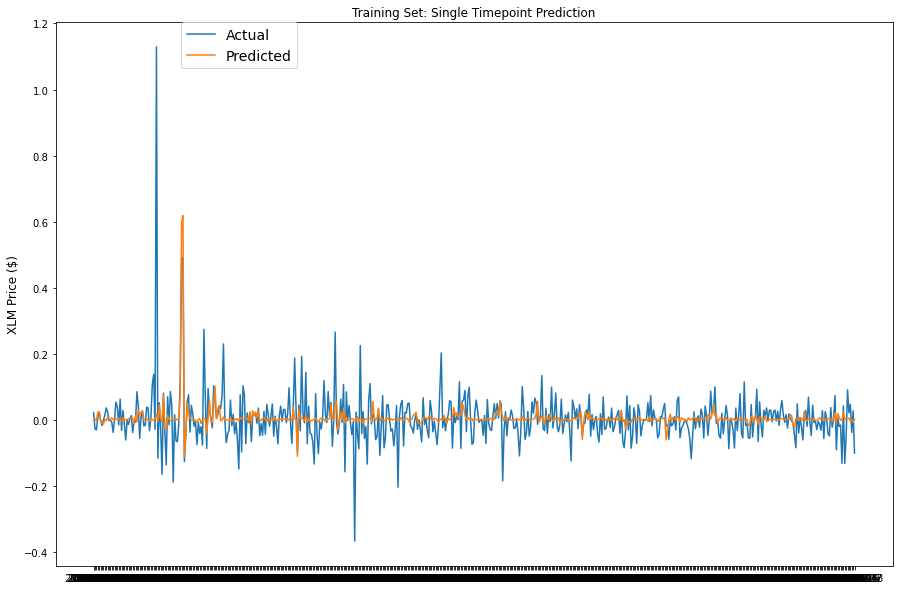

In [100]:
fig, ax1 = plt.subplots(figsize=(15,10))
#ax1.set_xticks([datetime.date(i,j,1) for i in range(2020,2022) for j in [1,3,6,9,12]])
#ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2020,2022) for j in [1,3,6,9,12]])
#ax1.plot(df[df['time_close']< split_date]['time_close'][window_len:],
#         training_set['tomorrow change'][window_len:], label='Actual')
#ax1.plot(df[df['time_close']< split_date]['time_close'][window_len:],
#         xlm_model.predict(LSTM_training_inputs), 
#         label='Predicted')
ax1.plot(training_set['tomorrow change'][window_len:], label='Actual')
ax1.plot(xlm_model.predict(LSTM_training_inputs), 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('XLM Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})


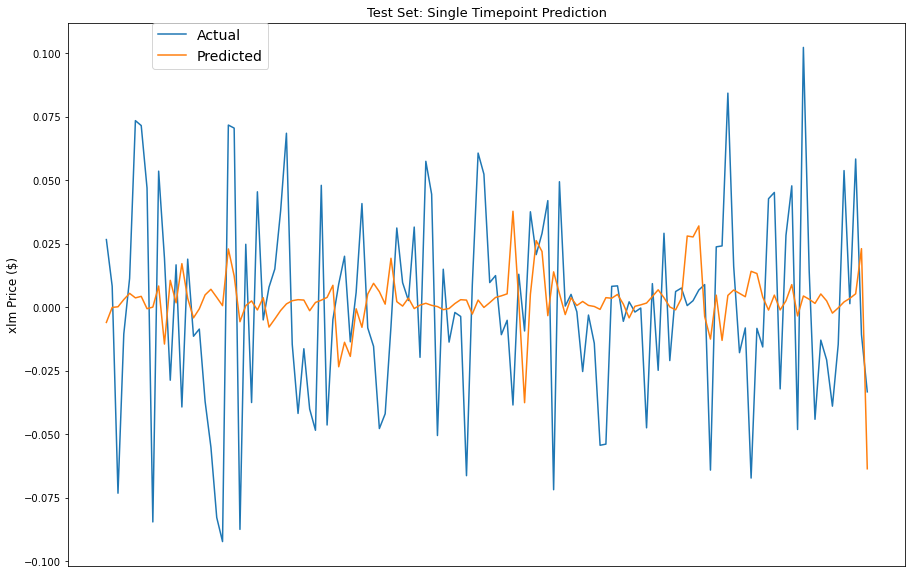

In [101]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.set_xticks([datetime.date(2020,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2020,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(df[df['time_close']> split_date]['time_close'][window_len:],
         test_set['tomorrow change'][window_len:], label='Actual')
ax1.plot(df[df['time_close']> split_date]['time_close'][window_len:],
         xlm_model.predict(LSTM_test_inputs), 
         label='Predicted')

ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('xlm Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [102]:
mse_train = mean_squared_error(y_train[window_len:], xlm_model.predict(LSTM_training_inputs))
mse_test = mean_squared_error(y_test[window_len:], xlm_model.predict(LSTM_test_inputs))
mse_train,mse_test

(0.0055070384148009355, 0.0015644108458768757)